In [1]:
# pip install --upgrade palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels scikit-learn pyjanitor session-info
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as s
import statsmodels.formula.api as smf
import statsmodels.stats as ss


/home/ojitos369/anaconda3/envs/pyd/lib/python3.12/site-packages/palmerpenguins/penguins.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [3]:
pnr = palmerpenguins.load_penguins_raw()
pn = palmerpenguins.load_penguins()

In [4]:
pn.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [5]:
pn.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Funciones de Probabilidad de Masas (PMF) (Probability Mass Function)

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

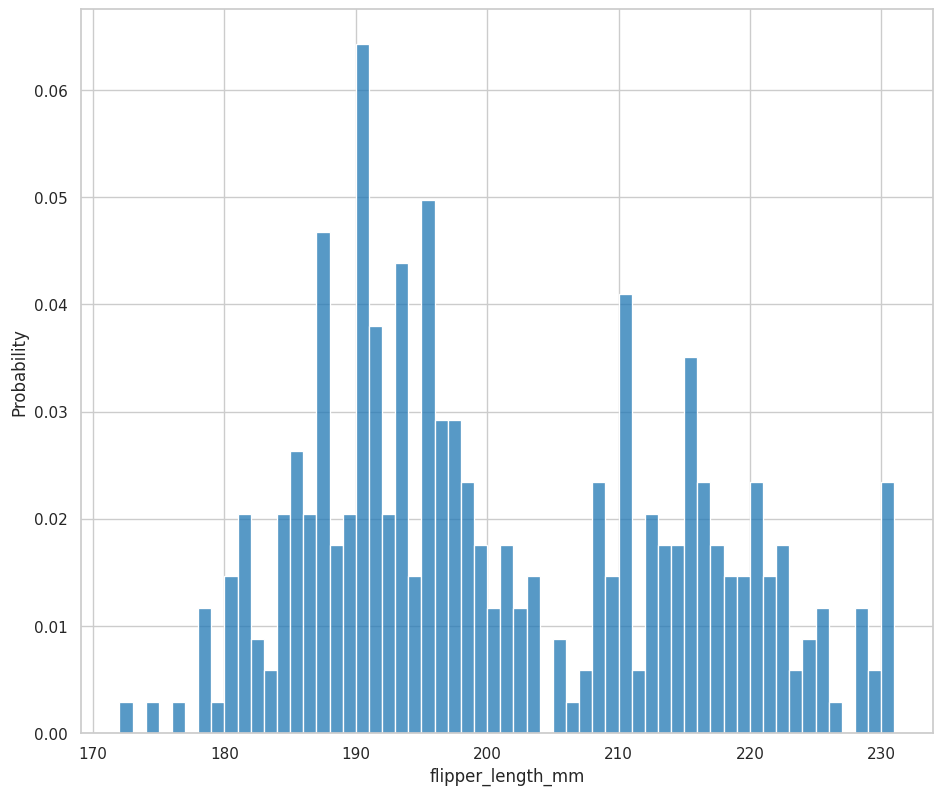

In [11]:
sns.histplot(
    data=pn,
    x="flipper_length_mm",
    binwidth=1,
    stat="probability" # para tomar probabilidad y no conteo
)

In [22]:
prop = empiricaldist.Pmf.from_seq(
    pn.flipper_length_mm,
    normalize=True, # True da las probabilidades, con False los conteos
)
prop

,probs
flipper_length_mm,
172.0,0.002924
174.0,0.002924
176.0,0.002924
178.0,0.011696
179.0,0.002924
180.0,0.014620
181.0,0.020468
182.0,0.008772
183.0,0.005848


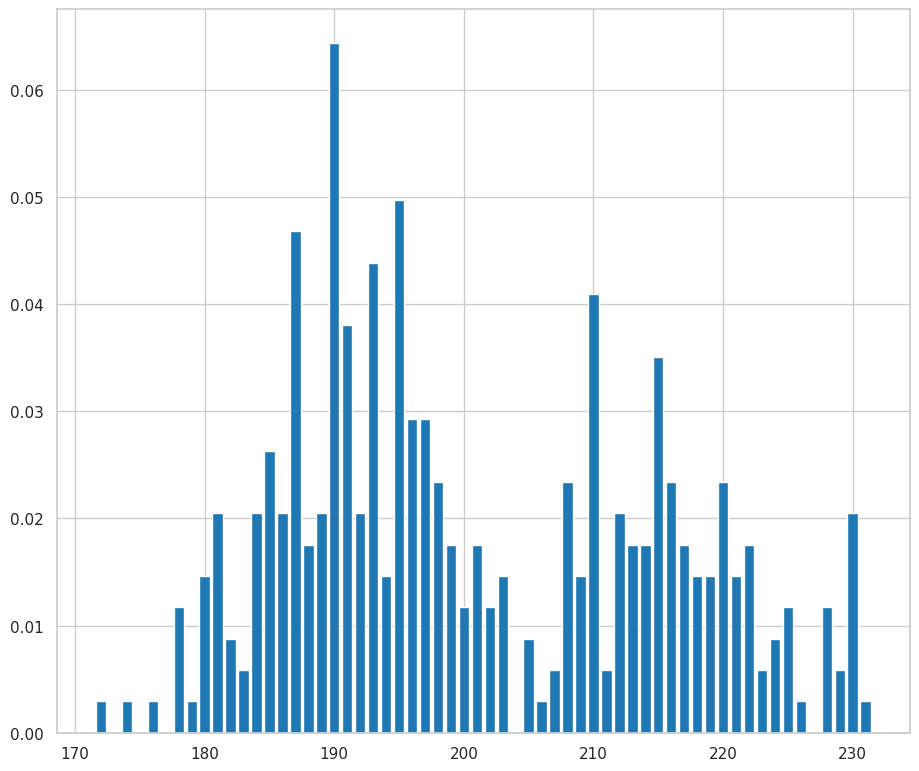

In [23]:
prop.bar()

In [24]:
prop(190)

np.float64(0.06432748538011696)

In [ ]:
# prop.flipper_length_mm.max()
# pn.flipper_length_mm.max()
print(f"valor maximo <prop.index.max()>: {prop.index.max()}")
print(f"valor minimo <prop.index.min()>: {prop.index.min()}")
print(f"valor con mayor probabilidad <prop.idxmax()>: {prop.idxmax()}")
print(f"probabilidad maxima <prop.max()>: {prop.max()}")


valor maximo <prop.index.max()>: 231.0
valor minimo <prop.index.min()>: 172.0
valor con mayor probabilidad <prop.idxmax()>: 190.0
probabilidad maxima <prop.max()>: 0.06432748538011696


In [44]:
pn.flipper_length_mm.max()

np.float64(231.0)

### Funciones Empiricas de Probabilidad Acumulada (ECDF) (Empirical Cumulative Distribution Function)

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

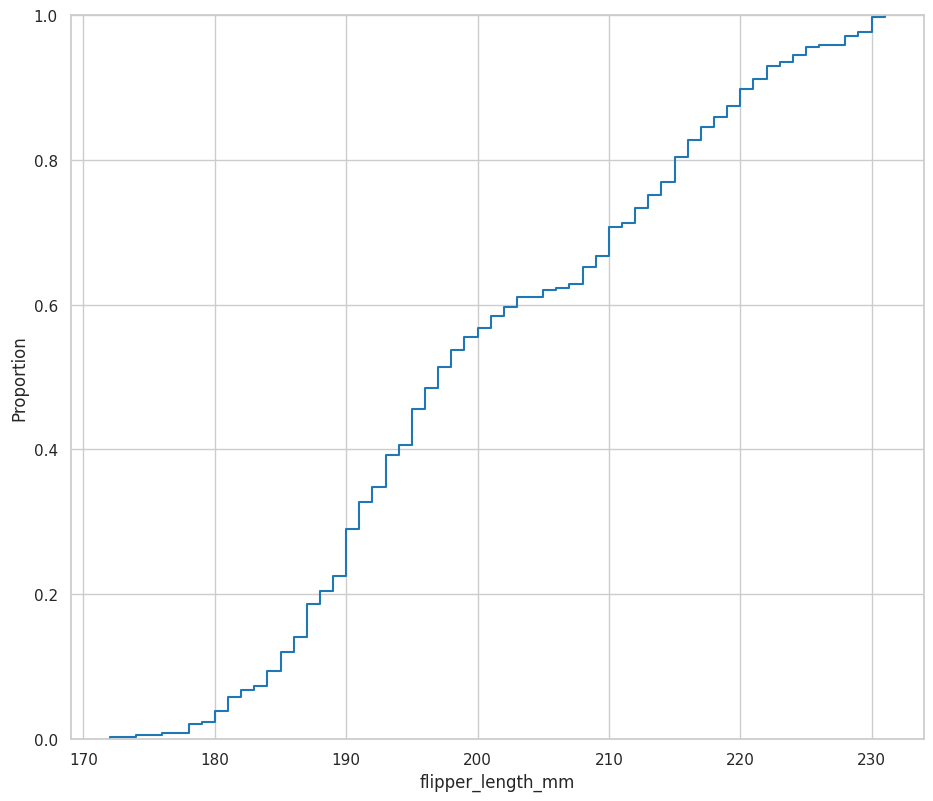

In [45]:
sns.ecdfplot(
    data=pn,
    x="flipper_length_mm"
)

In [47]:
ecdf = empiricaldist.Cdf.from_seq(pn.flipper_length_mm)
ecdf

,probs
flipper_length_mm,
172.0,0.002924
174.0,0.005848
176.0,0.008772
178.0,0.020468
179.0,0.023392
180.0,0.038012
181.0,0.058480
182.0,0.067251
183.0,0.073099


<Axes: xlabel='flipper_length_mm'>

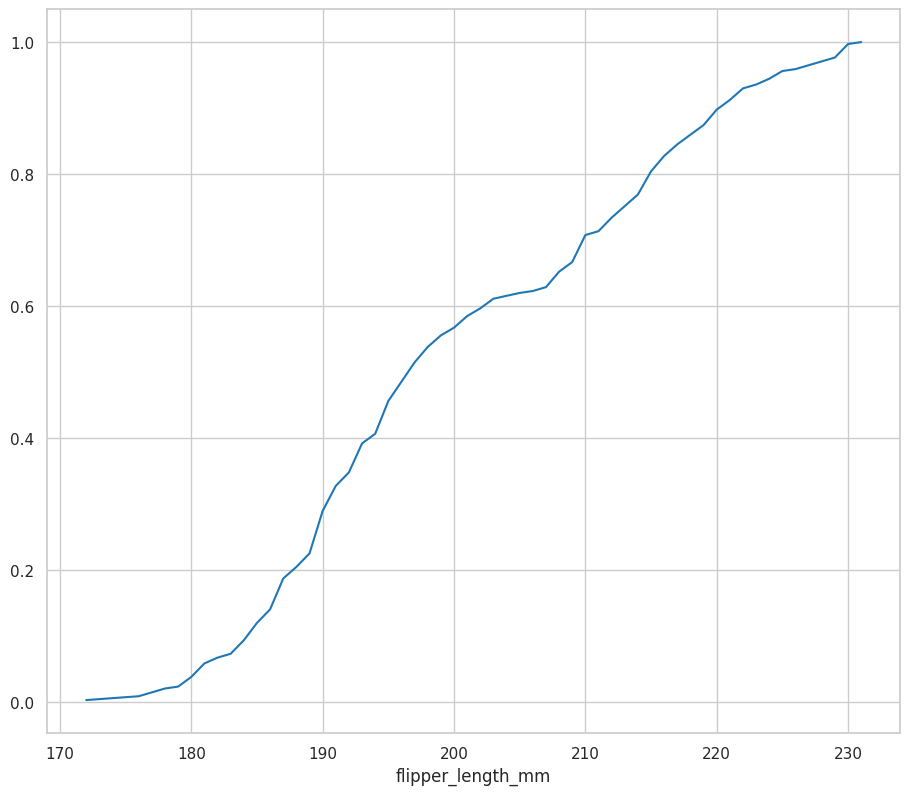

In [48]:
ecdf.plot()

In [50]:
ecdf(200)

array(0.56725146)

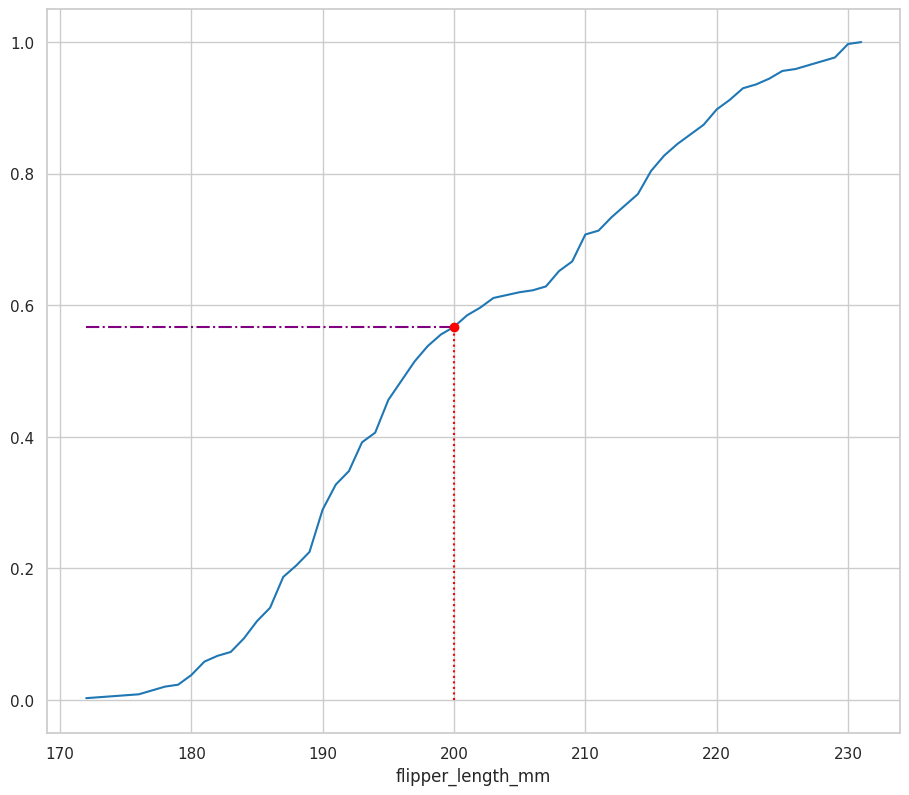

In [67]:
ecdf.plot()
q = 200
p = ecdf(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    colors="red",
    linestyles="dotted"
)
plt.hlines(
    y=p,
    xmin=pn.flipper_length_mm.min(),
    xmax=q,
    colors="purple",
    linestyles="dashdot"
)
plt.plot(q, p, 'ro')
plt.show()

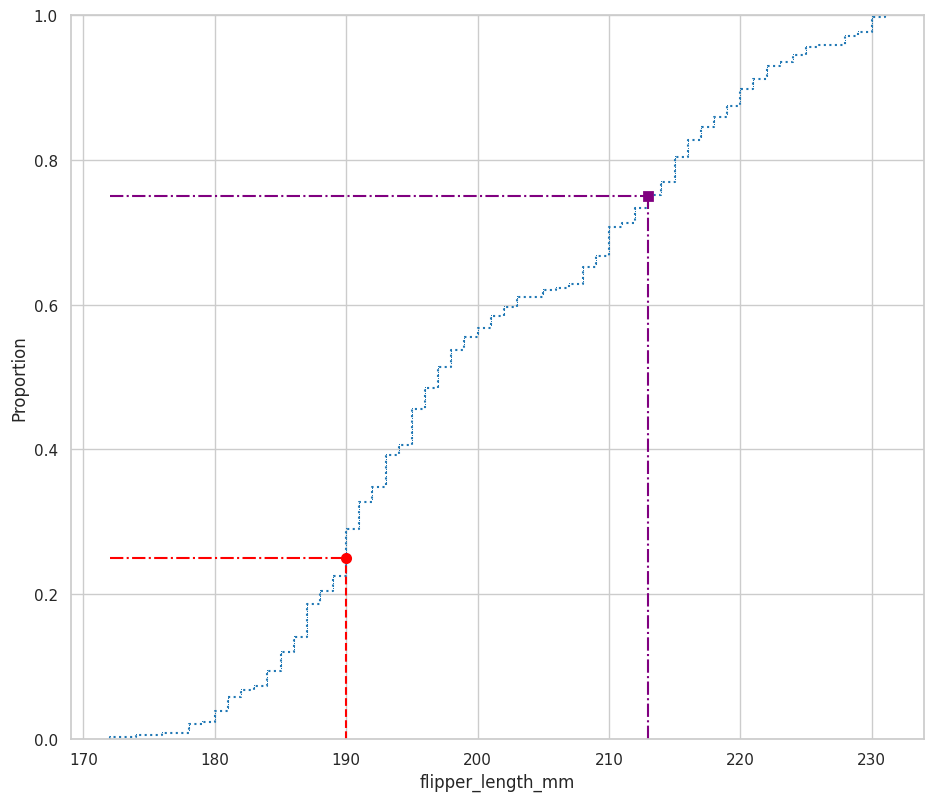

In [101]:
# Hacer Graficas con quantiles
q1 = ecdf.inverse(0.25)
q3 = ecdf.inverse(0.75)

# ecdf.plot()
sns.ecdfplot(
    data=pn,
    x="flipper_length_mm",
    linestyle="dotted",
    marker=","
)

plt.vlines(
    x=q1,
    ymin=0,
    ymax=0.25,
    color="red",
    linestyle="dashed"
)
plt.hlines(
    y=0.25,
    xmin=pn.flipper_length_mm.min(),
    xmax=q1,
    color="red",
    linestyle="dashdot"
)
plt.plot(q1, 0.25, "ro", markeredgewidth=2)
plt.vlines(
    x=q3,
    ymin=0,
    ymax=0.75,
    color="purple",
    linestyle="dashdot"
)
plt.hlines(
    y=0.75,
    xmin=pn.flipper_length_mm.min(),
    xmax=q3,
    color="purple",
    linestyle="dashdot"
)
plt.plot(q3, 0.75, marker="s", color="purple", markeredgewidth=2)
plt.show()

### Comparando distribuciones

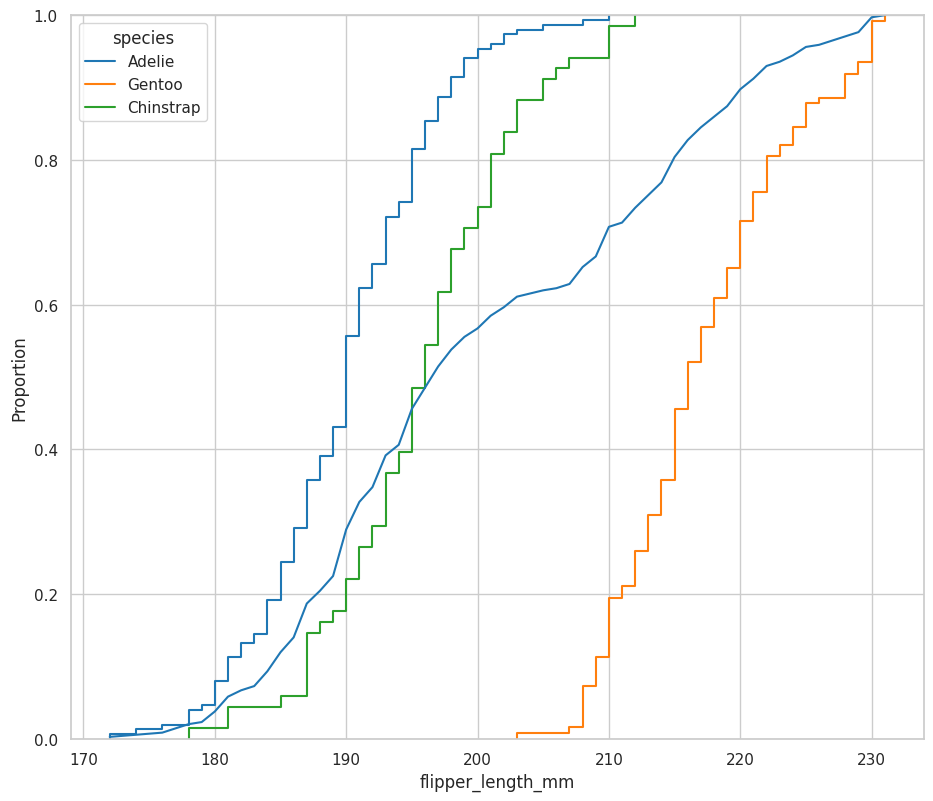

In [ ]:
sns.ecdfplot(
    data=pn,
    x="flipper_length_mm",
    hue="species"
)
ecdf.plot()
plt.show()

In [103]:
wd = pn.flipper_length_mm
wd

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339    207.0
340    202.0
341    193.0
342    210.0
343    198.0
Name: flipper_length_mm, Length: 344, dtype: float64

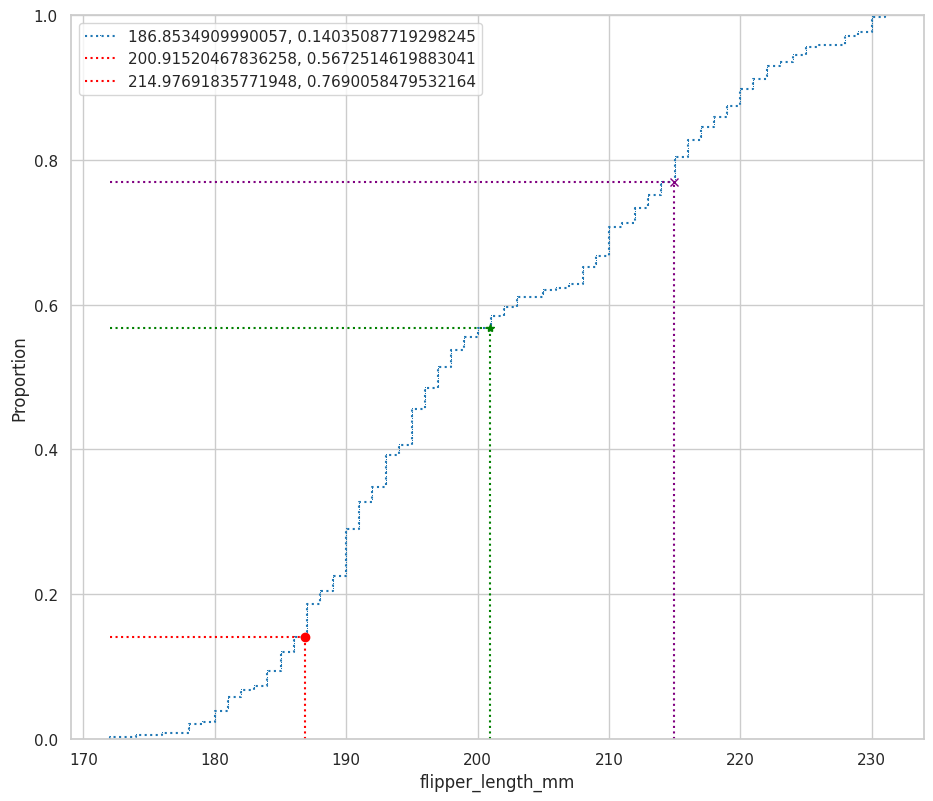

In [122]:
std = wd.std()
mean = wd.mean()

pmean = ecdf(mean)
pmax = ecdf(mean + std)
pmin = ecdf(mean - std)

sns.ecdfplot(
    data=pn,
    x="flipper_length_mm",
    linestyle="dotted",
    marker=","
)
legends = []
def dot_maker(x, y, xmin=pn.flipper_length_mm.min(), ymin=0, color="red", line="dotted", mark="o"):
    plt.vlines(
        x=x,
        ymin=ymin,
        ymax=y,
        color=color,
        linestyle=line
    )
    plt.hlines(
        y=y,
        xmin=xmin,
        xmax=x,
        color=color,
        linestyle=line
    )
    plt.plot(x, y, color=color, marker=mark)
    legends.append(f"{x}, {y}")

dot_maker(mean - std, pmin)
dot_maker(mean, pmean, color="green", mark="*")
dot_maker(mean + std, pmax, color="purple", mark="x")

plt.legend(legends)
plt.show()

In [ ]:
# prop.flipper_length_mm.max()
# pn.flipper_length_mm.max()
print(f"valor maximo <prop.index.max()>: {prop.index.max()}")
print(f"valor minimo <prop.index.min()>: {prop.index.min()}")
print(f"valor con mayor probabilidad <prop.idxmax()>: {prop.idxmax()}")
print(f"probabilidad maxima <prop.max()>: {prop.max()}")


valor maximo <prop.index.max()>: 231.0
valor minimo <prop.index.min()>: 172.0
valor con mayor probabilidad <prop.idxmax()>: 190.0
probabilidad maxima <prop.max()>: 0.06432748538011696
